output distribution size =  2000


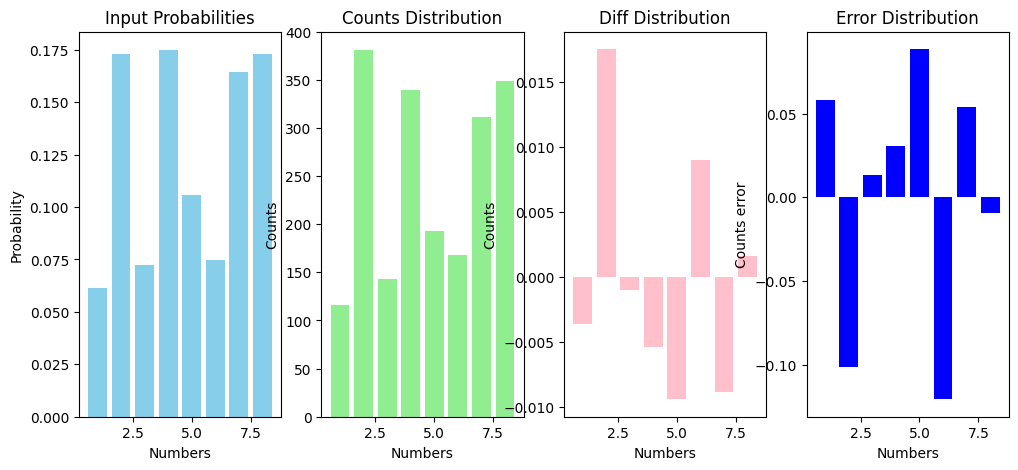

: 

In [ ]:
""" Generate a distribution of numbers using a given set of probabilities. 
    The distribution is generated by repeating the given probabilities a given number of times (numbers length*multiplier).
    The output is a vector of numbers.
    It plots the input probabilities, the output distribution and the difference between them, along with the normalized counts error."""


# Import required libraries
import matplotlib.pyplot as plt
import numpy as np


# clear probabilities
probabilities =[]


# Function to generate distribution
def generate_distribution(numbers, probabilities, multiplier):
    n = len(numbers)
    if n != len(probabilities):
        print("len(numbers) = ", n , " len(probabilities) = ", len(probabilities))
        raise ValueError("The length of numbers and probabilities must be the same.")

    if abs(sum(probabilities) - 1) > 1e-6:
        raise ValueError("Probabilities must sum up to 1.")

    # Calculate the size of the output vector
    output_size = n * multiplier
    print("output distribution size = ", output_size)

    # Generate the distribution
    output_vector = np.random.choice(numbers, size=output_size, p=probabilities)

    return output_vector

def generate_random_probabilities(length):
    if length <= 0:
        raise ValueError("Length must be a positive integer.")

    # Generate random numbers
    random_values = np.random.random(length)

    # Normalize to sum up to 1
    probabilities = random_values / random_values.sum()

    return probabilities

# Function to plot the results
def plot_results(numbers, probabilities, output_vector):
    # Count the occurrences in the output vector
    counts = [np.sum(output_vector == number) for number in numbers]
    # Normalize the counts to sum up to 1
    norm_counts = [count / sum(counts) for count in counts]
    diff_counts = [norm_counts[i] - probabilities[i] for i in range(len(numbers))]

    # counts error (normalized counts - probabilities)/probabilities
    counts_error = [(probabilities[i]-norm_counts[i])/probabilities[i] for i in range(len(numbers))]

    # Plotting
    fig, axes = plt.subplots(1, 4, figsize=(12, 5))

    # Plot 1: Input probabilities
    axes[0].bar(numbers, probabilities, color='skyblue')
    axes[0].set_title('Input Probabilities')
    axes[0].set_xlabel('Numbers')
    axes[0].set_ylabel('Probability')

    # Plot 2: Output distribution
    axes[1].bar(numbers, counts, color='lightgreen')
    axes[1].set_title('Counts Distribution')
    axes[1].set_xlabel('Numbers')
    axes[1].set_ylabel('Counts')

    # plot 3: distribution the diff_counts (normalized counts - probabilities)
    axes[2].bar(numbers, diff_counts, color='pink')
    axes[2].set_title('Diff Distribution')
    axes[2].set_xlabel('Numbers')
    axes[2].set_ylabel('Counts')

    # plot 4: distribution the counts_error (normalized counts - probabilities)/probabilities
    axes[3].bar(numbers, counts_error, color='blue')
    axes[3].set_title('Error Distribution')
    axes[3].set_xlabel('Numbers')
    axes[3].set_ylabel('Counts error')


    plt.show()

# Example data
# numbers = [1, 2, 3, 4]
# probabilities = [0.1, 0.3, 0.4, 0.2]  # This should sum up to 1
# multiplier => [p(1-p)] / (0.2-p)^2 * len(groups) = 57
multiplier = 250  # This is the number of times we want to repeat the distribution


# generate vector of int numbers using range
num = 8 # max group number of 25 with 250 multiplier
numbers = list(range(1, num+1))

# Generate random probabilities
probabilities = generate_random_probabilities(num)
print("probabilities = ", probabilities)

# Generate distribution and plot the results
output_vector = generate_distribution(numbers, probabilities, multiplier)
plot_results(numbers, probabilities, output_vector)


In [12]:
numbers = [1, 2, 3, 4]
probabilities = [0.1, 0.48, 0.4, 0.02]  # This should sum up to 1
# multiplier => [p(1-p)] / (0.2-p)^2 * len(groups) = 57
p = np.min(probabilities)
# calcutale the multiplier
multiplier = int((p*(1-p)) / ((0.2-p)**2) * len(numbers))
print(multiplier)

2


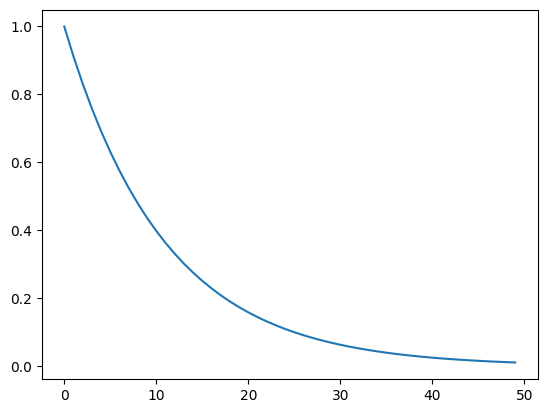

In [12]:
from matplotlib import pyplot as plt
a = range(0, 50)
numbers = list(a) 
n1= 10
decay = 25
y =  [n1** (-num/decay) for num in numbers]
plt.plot(numbers, y)
plt.show()